In [1]:
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#evaluation libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [2]:
fashion_train = pd.read_csv("fashion-mnist_train.csv")
fashion_test = pd.read_csv("fashion-mnist_test.csv")

In [4]:
fashion_train.shape

(60000, 785)

In [5]:
x_train_fashion = fashion_train.drop('label',axis=1)
y_train_fashion = fashion_train['label']
x_test_fashion = fashion_test.drop('label',axis=1)
y_test_fashion = fashion_test['label']

<function matplotlib.pyplot.show(close=None, block=None)>

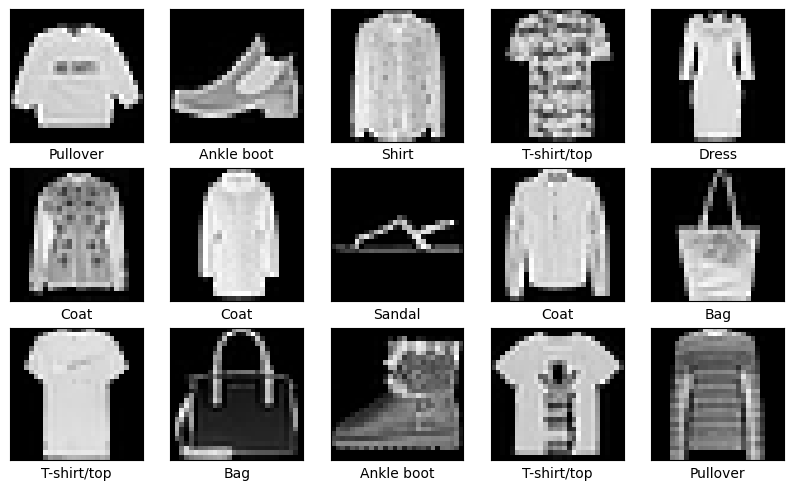

In [6]:
x_train_reshape = x_train_fashion.values.reshape(-1,28,28)
x_test_reshape = x_test_fashion.values.reshape(-1,28,28)

col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#visulaizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i],cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show

In [7]:
x_train_fashion.shape

(60000, 784)

In [8]:
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)
y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [10]:
#creating base neural network
model = keras.Sequential([
    keras.layers.Dense(128,activation='relu',input_shape=(784,)),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(24,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(24,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │           3,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,130 (410.66 KB)

 Trainable params: 104,778 (409.29 KB)

 Non-trainable params: 352 (1.38 KB)

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history=model.fit(x_train_fashion,y_train_fashion,batch_size=100,epochs=30,validation_data=(x_test_fashion,y_test_fashion))

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5221 - loss: 1.4347 - val_accuracy: 0.8243 - val_loss: 0.5266
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7447 - loss: 0.7500 - val_accuracy: 0.8084 - val_loss: 0.5285
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7696 - loss: 0.6811 - val_accuracy: 0.8461 - val_loss: 0.4482
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7877 - loss: 0.6313 - val_accuracy: 0.8543 - val_loss: 0.4174
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7937 - loss: 0.6061 - val_accuracy: 0.8489 - val_loss: 0.4309
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8038 - loss: 0.5836 - val_accuracy: 0.8576 - val_loss: 0.4212
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8119 - loss: 0.5688 - val_accuracy: 0.8604 - val_loss: 0.4199
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8105 - loss: 0.5635 - val_accuracy: 0.

In [13]:
test_loss_fashion,test_acc_fashion = model.evaluate(x_test_fashion,y_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8712 - loss: 0.3708


In [14]:
print("Fashion Mnist test accuracy",round(test_acc_fashion,4))

Fashion Mnist test accuracy 0.8731


In [15]:
y_predict_fash = model.predict(x_test_fashion)
y_predict_fash = np.argmax(y_predict_fash,axis=1)
y_test_fash_eval = np.argmax(y_test_fashion,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


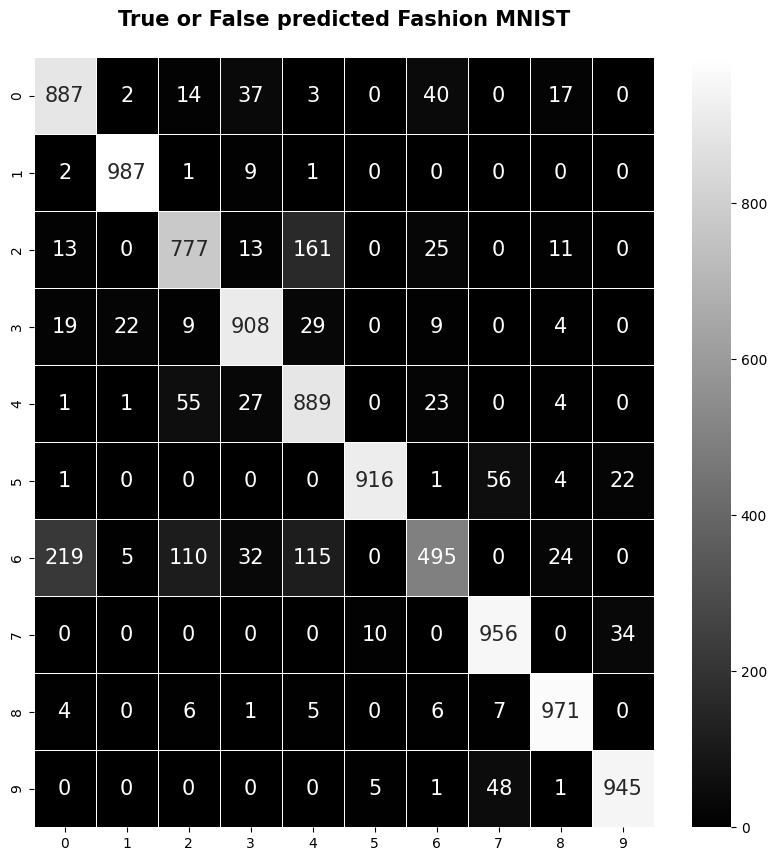

In [16]:
#Confusion matrix for Fashion MNIST

con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight="bold",fontsize=15)
plt.show()

In [ ]:
# print(plt.style.available)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1000
           1       0.97      0.99      0.98      1000
           2       0.80      0.78      0.79      1000
           3       0.88      0.91      0.90      1000
           4       0.74      0.89      0.81      1000
           5       0.98      0.92      0.95      1000
           6       0.82      0.49      0.62      1000
           7       0.90      0.96      0.93      1000
           8       0.94      0.97      0.95      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [18]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


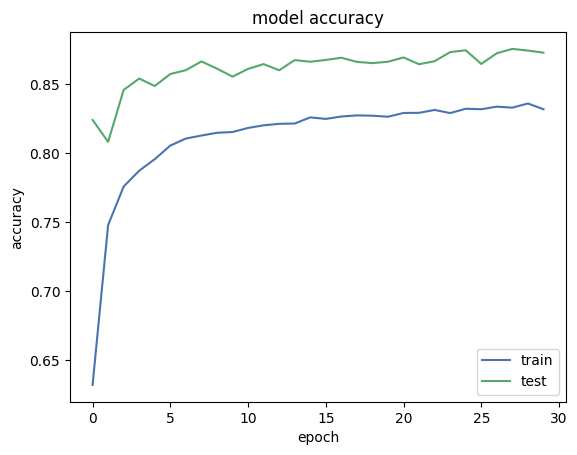

In [19]:
#summarize history of accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()


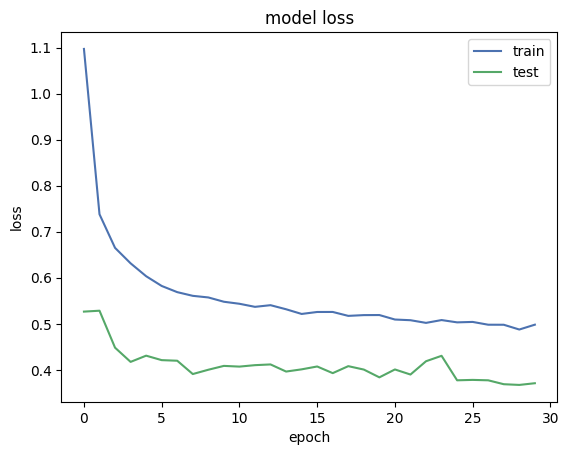

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()


In [21]:
import tensorflow as tf
import numpy as np

# # Reshape and cast input
# input_image = tf.expand_dims(x_test_fashion[2], axis=0)  # (1, 28, 28)
# input_image = tf.expand_dims(input_image, axis=-1)     # (1, 28, 28, 1)
# input_image = tf.cast(input_image, tf.float32) / 255.0  # Cast and normalize

# Predict
y_predict = model.predict(x_test_fashion.loc[[0],:].values)
y_predict = np.argmax(y_predict, axis=1)

# Get true label
y_test_fash_eval = np.argmax(y_test_fashion, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


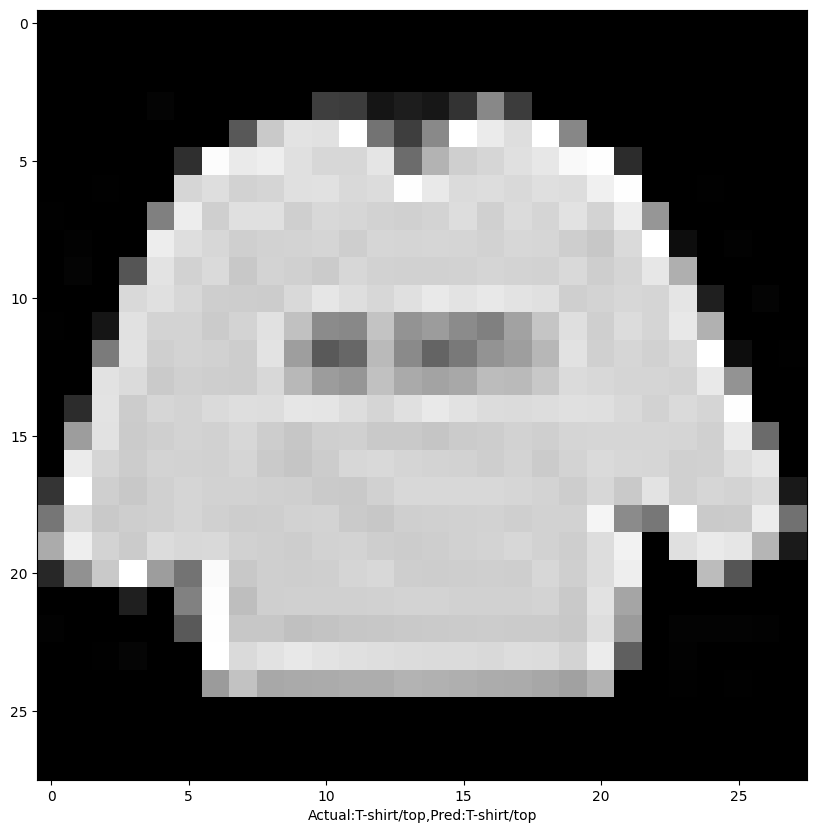

In [22]:
#Names of numbers in dataset in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the digits
plt.figure(figsize=(10,10))
plt.imshow(x_train_reshape[0],cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()